In [1]:
 ## Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as sp
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import files
#file = files.upload()

In [3]:
#file

In [4]:
#import io
#df = pd.read_csv(io.StringIO(file['Insurance_dataset.csv'].decode('utf-8')))
#print(df)

In [5]:
df = pd.read_csv('Insurance_dataset.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Cleansing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df.describe(include = [object])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Handling Missing Data

In [10]:
print("Kolom yang memiliki missing value adalah :")
df.columns[df.isnull().any()].tolist()

Kolom yang memiliki missing value adalah :


[]

## Handling Duplicated Data

In [11]:
df.duplicated().sum()

0

## Handling Outliers

In [12]:
num = ['id', 'Age', 'Annual_Premium', 'Vintage']
cat = ['Gender', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

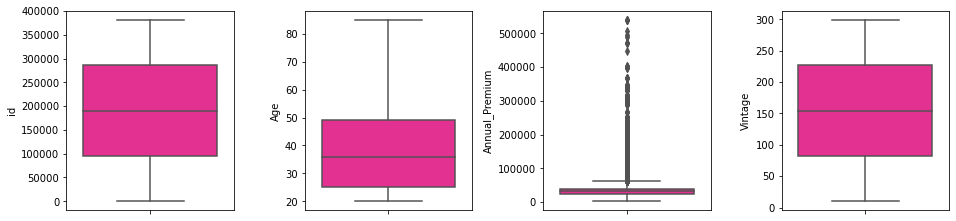

In [13]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=df[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

In [14]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
IQR

14995.0

In [15]:
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
filtered_entries = ((df['Annual_Premium'] >= low) & (df['Annual_Premium'] <= high))
data = df[filtered_entries]
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [16]:
data.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000
mean,190534.855484,38.670344,0.997942,26.437281,0.459666,29264.643973,112.542923,154.345442,0.121781
std,110036.802591,15.440166,0.045316,13.310391,0.498371,14743.056656,54.039616,83.670478,0.327033
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95219.000000,25.000000,1.000000,15.000000,0.000000,24102.000000,30.000000,82.000000,0.000000
50%,190529.000000,36.000000,1.000000,28.000000,0.000000,31319.000000,151.000000,154.000000,0.000000
75%,285823.000000,49.000000,1.000000,36.000000,1.000000,38596.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,61892.000000,163.000000,299.000000,1.000000


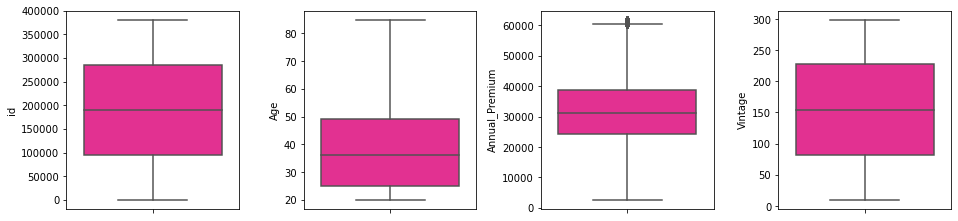

In [17]:
feature = num
plt.figure(figsize=(20, 15))
for i in range(0, len(feature)):
    plt.subplot(5, 6,  i+1)
    sns.boxplot(y=data[feature[i]], color='deeppink', orient='v')
    plt.tight_layout()

## Standarization

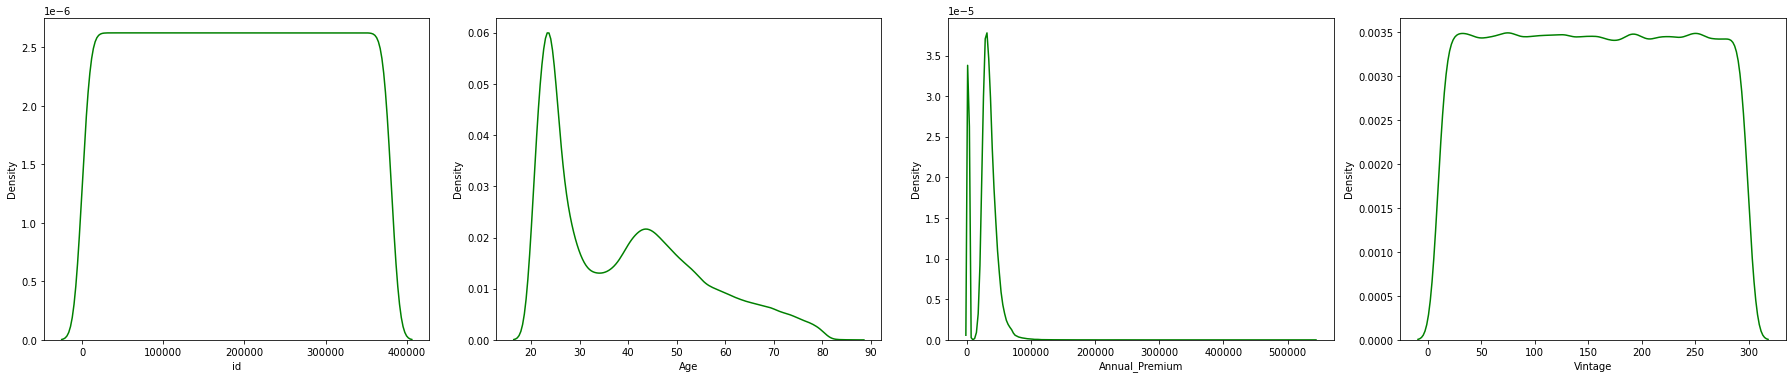

In [18]:
features = num
plt.figure(figsize=(25, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Vintage_std'] = StandardScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))
df['Vintage_norm'] = MinMaxScaler().fit_transform(df['Vintage'].values.reshape(len(df), 1))

In [20]:
df[['Vintage', 'Vintage_std', 'Vintage_norm']].describe()

,Vintage,Vintage_std,Vintage_norm
count,381109.000000,3.811090e+05,381109.000000
mean,154.347397,-6.921441e-17,0.499472
std,83.671304,1.000001e+00,0.289520
min,10.000000,-1.725174e+00,0.000000
25%,82.000000,-8.646631e-01,0.249135
50%,154.000000,-4.151927e-03,0.498270
75%,227.000000,8.683108e-01,0.750865
max,299.000000,1.728822e+00,1.000000


In [21]:
cek_vin = ['Vintage', 'Vintage_std', 'Vintage_norm']

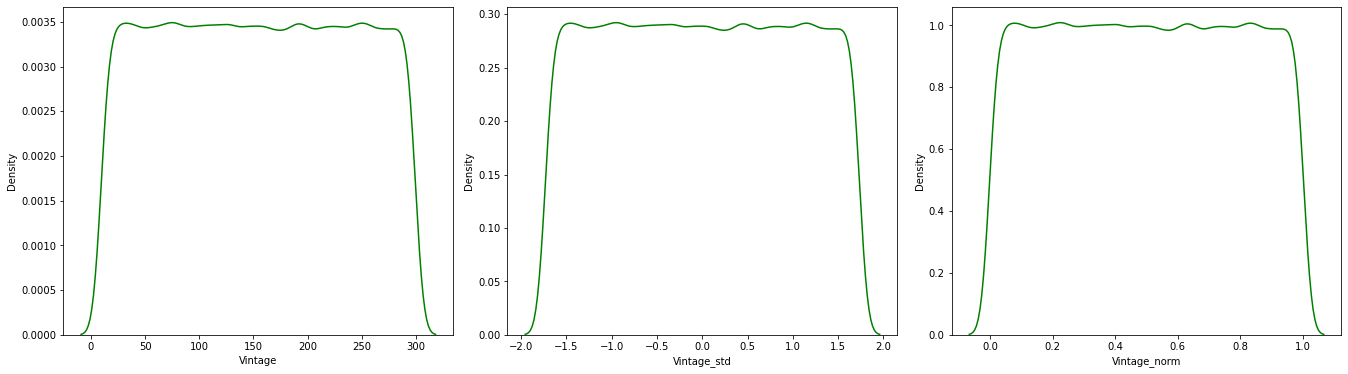

In [22]:
feat = cek_vin
plt.figure(figsize=(25, 10))
for i in range(0, len(feat)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[feat[i]], color='green')
    plt.xlabel(feat[i])
    plt.tight_layout()

Sementara data vintage belum ditransformasi, akan ditentukan setelah dicobakan pada machine learning pada tahapan selanjutnya

In [23]:
cek_log = ['Age', 'Annual_Premium']

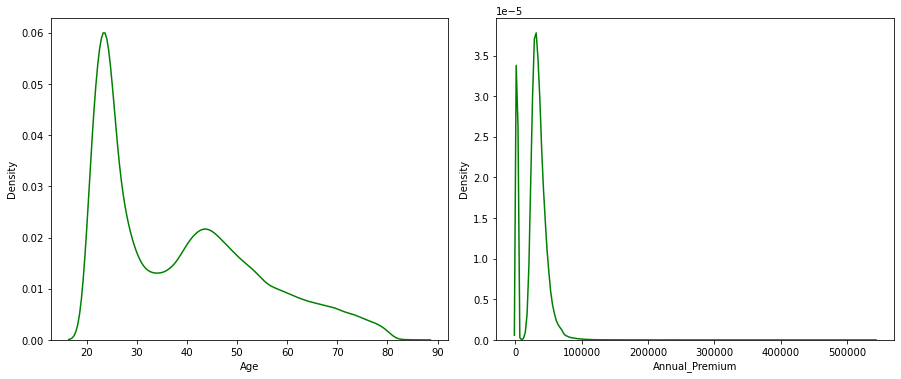

In [24]:
feat = cek_log
plt.figure(figsize=(25, 10))
for i in range(0, len(feat)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[feat[i]], color='green')
    plt.xlabel(feat[i])
    plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Density'>

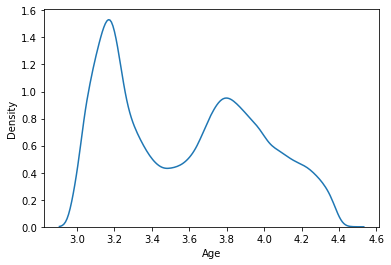

In [25]:
sns.kdeplot(np.log(df['Age']))

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

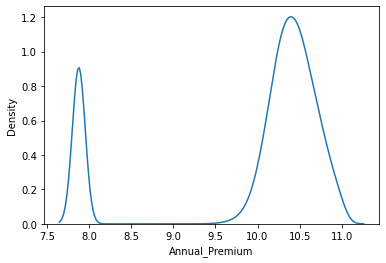

In [26]:
sns.kdeplot(np.log(data['Annual_Premium']))

## Feature Encoding

In [27]:
cats_updated = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(data[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
Male      200319
Female    170470
Name: Gender, dtype: int64
------------------------------ 

value counts of column Vehicle_Age
1-2 Year     194212
< 1 Year     161547
> 2 Years     15030
Name: Vehicle_Age, dtype: int64
------------------------------ 

value counts of column Vehicle_Damage
Yes    186561
No     184228
Name: Vehicle_Damage, dtype: int64
------------------------------ 



In [28]:
# Gender & Vehicle_Damage
mapping_Gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_vehicle_damage = {
    'No' : 0,
    'Yes' : 1
    
}

mapping_vehicle_Age = {
    '< 1 Year' : 0,
    '1-2 Year' : 1,
    '> 2 Years' : 2
    
}

df['Gender'] = df['Gender'] .map(mapping_Gender)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(mapping_vehicle_damage)
df['Vehicle_Age'] = df['Vehicle_Age'].map(mapping_vehicle_Age)

In [29]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_std,Vintage_norm
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.748795,0.716263
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.342443,0.598616
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,-1.521998,0.058824
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.581474,0.667820
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,-1.378580,0.100346


## Class Imbalance

In [30]:
cat_vc = ['Gender', 'Driving_License', 'Policy_Sales_Channel', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

for col in cat_vc:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Gender
0    206089
1    175020
Name: Gender, dtype: int64
------------------------------ 

value counts of column Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
------------------------------ 

value counts of column Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64
------------------------------ 

value counts of column Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0    

In [31]:
!pip install imbalanced-learn

In [32]:
df['DL_class'] = df['Driving_License'] == 1
df['DL_class'].value_counts()

True     380297
False       812
Name: DL_class, dtype: int64

In [33]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Driving_License', 'DL_class']]]
Y = df['DL_class'].values
print(X.shape)
print(Y.shape)

(381109, 13)
(381109,)


In [34]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [35]:
x_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, Y)
x_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, Y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, Y)

In [36]:
print('Normal')
print(pd.Series(Y).value_counts())
print('\n')
print('Under Sampling')
print(pd.Series(y_under).value_counts())
print('\n')
print('Over Sampling')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Normal
True     380297
False       812
dtype: int64


Under Sampling
False    812
True     812
dtype: int64


Over Sampling
True     380297
False    380297
dtype: int64


SMOTE
True     380297
False    380297
dtype: int64


In [37]:
df['VA_class'] = df['Vehicle_Age'] == 1
df['VA_class'].value_counts()

True     200316
False    180793
Name: VA_class, dtype: int64

In [38]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Vehicle_Age', 'VA_class']]]
Y = df['VA_class'].values
print(X.shape)
print(Y.shape)

(381109, 14)
(381109,)


In [39]:
x_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, Y)
x_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, Y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, Y)

In [40]:
print('Normal')
print(pd.Series(Y).value_counts())
print('\n')
print('Under Sampling')
print(pd.Series(y_under).value_counts())
print('\n')
print('Over Sampling')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Normal
True     200316
False    180793
dtype: int64


Under Sampling
False    180793
True     180793
dtype: int64


Over Sampling
False    200316
True     200316
dtype: int64


SMOTE
False    200316
True     200316
dtype: int64


In [41]:
df['Response_class'] = df['Response'] == 0
df['Response_class'].value_counts()

True     334399
False     46710
Name: Response_class, dtype: int64

In [42]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'Response_class']]]
Y = df['Response_class'].values
print(X.shape)
print(Y.shape)

(381109, 15)
(381109,)


In [43]:
x_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, Y)
x_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, Y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, Y)

In [44]:
print('Normal')
print(pd.Series(Y).value_counts())
print('\n')
print('Under Sampling')
print(pd.Series(y_under).value_counts())
print('\n')
print('Over Sampling')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Normal
True     334399
False     46710
dtype: int64


Under Sampling
False    46710
True     46710
dtype: int64


Over Sampling
False    334399
True     334399
dtype: int64


SMOTE
False    334399
True     334399
dtype: int64


In [45]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_std,Vintage_norm,DL_class,VA_class,Response_class
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.748795,0.716263,True,False,False
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.342443,0.598616,True,True,True
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,-1.521998,0.058824,True,False,False
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.581474,0.667820,True,False,True
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,-1.378580,0.100346,True,False,True


## **Feature Engineering**

In [46]:
#Feature selection refer to EDA in the 1st stage & refer to business knowledge

df2 = df[['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel']]
df2['Annual_Premium'] = df2['Annual_Premium'].astype(int)
df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,0,44,1,28.0,0,2,1,40454,26.0
1,0,76,1,3.0,0,1,0,33536,26.0
2,0,47,1,28.0,0,2,1,38294,26.0
3,0,21,1,11.0,1,0,0,28619,152.0
4,1,29,1,41.0,1,0,0,27496,152.0


Berdasarkan hasil analisa pada proses EDA (Exploratory Data Analysis) serta referensi yang didapatkan dari data external (OJK). Maka feature yang digunakan yaitu sebagai berikut:

1.   Gender
      Berdasarkan hasil EDA menunjukkan bahwa lebih dari 300.000 pengguna yang terdiri dari laki-laki dan perempuan tidak tertarik untuk menggunakan produk asuransi kendaraan, hanya sekitar 10% dari total keseluruhan pengguna yang memiliki 
ketertarikan untuk menggunakan produk asuransi kendaraan. Sehingga, dapat ditarik kesimpulan bahwa tidak ada pengaruh yang signifikan jika produk asuransi ditawarkan berdasarkan gender dari pengguna .

2.   Age
     Berdasarkan hasil EDA menunjukkan bahwa rentang usia 40 tahun sampai 50 tahun memiliki ketertarikan yang lebih tinggi untuk menggunakan jasa asuransi kendaraan sedangkan customer pada rentang usia 20 tahun sampai 30 tahun cenderung tidak tertarik menggunakan jasa asuransi kendaraan.  Dari data tersebut dapat diambil kesimpulan untuk lebih memfokuskan promosi asuransi kendaraan kepada customer dengan rentang usia 40 tahun sampai 50 tahun.

3.   Driving Lisence
      Berdasarkan hasil EDA dapat dilihat bahwa banyak konsumen yang memiliki Driving License namun belum tertarik untuk mengambil Asuransi Kendaraan. Konsumen yang sudah memiliki Driving License dapat didorong dengan memberikan informasi keuntungan memiliki Asuransi Kendaraan atau promosi asuransi.

4.   Previously Insured
      Secara bisnis kita dapat menggali informasi lebih dalam melalui customer yang pernah mengasuransikan kendaraannya namun tidak tertarik ketika ditawarkan kembali, kita dapat menggali faktor apa saja yang  menyebabkan customer tidak tertarik lagi. apakah dari proses claimmnya yang tidak memuaskan? atau cakupan manfaatnya kurang sesuai?. kemudian dari informasi tersebut dapat kita gunakan untuk mengembangkan produk kita agar lebih sesuai dengan kebutuhan customer.

5.  Vehicle Age
     Berdasarkan hasil EDA menunjukkan perbandingan data customer yang seimbang berada pada Vehicle Age yang nomor 2, bisa diperkirakan 50:50. Pihak asuransi dapat menambah jumlah kendaraan yang baru untuk meningkatkan ketertarikan masyarakat untuk berlangganan asuransi kendaraan. Dengan menggunakan kendaraan yang baru dapat menurunkan tingkat kerusakan kendaraan dan masyarakat juga merasa aman dalam menggunakan kendaraan tersebut. 

6.   Vehicle Damage
      Berdasarkan grafik dapat diketahui bahwa total user yang kendaraannya sudah pernah mengalami kerusakan, memberi respon tertarik (1) lebih banyak dibandingkan dengan user yang kendaraannya tidak terdapat kerusakan. Jika dibandingkan, total user dengan respon tidak tertarik (0) dengan kendaraan yang tidak mengalami kerusakan lebih banyak dibandingkan 
dengan yang mengalami kerusakan

7.   Annual Premium 
      Annual Premium tidak berpengaruh terhadap Response konsumen 
karena jumlah Response Yes dan No terhadap Annual Premium berimbang. Maka dapat disimpulkan bahwa Annual Premium tidak dapat dijadikan sebagai faktor untuk menarik konsumen mengambil asuransi kendaraan. Namun feature ini diperlukan untuk mencari tahu besaran premi yang dibayarkan oleh tiap customer sehinggga feature ini bisa dijadikan suatu metode / data pendukung dalam approaching potential customer.


Adapun, feature yang di drop dari dataframe diatas yaitu:

1.   Id
     Berdasarkan hasil EDA, Id customer hanya mmerupakan nomor urut untuk  identitas customer sehingga tidak ditemukan korelasi / pengaruh terhadap response

2.   Vintage
      Berdasarkan hasil EDA, feature vintage tidak memiliki korelasi / pengaruh terhadap response customer terhadap layanan vehicle insurance ini. Sehingga feature ini tidak dapat dijadikan sebagaii dasar / data pendukung untuk approaching customer.

3.   Driving Lisence
      Berdasarkan hasil EDA, Driving lisence tidak mempengaruhi response customer mengenai ketertarikannya untuk menggunakan jasa layanan asuransi kendaraan bermotor.



**Penambahan Feature Baru**

Berdasarkan referensi dari data external (OJK), didapatkan 2 tambahan feature / variable yang sering kali digunakan oleh perusahaan asuransi kendaraan bermotor untuk melakukan pendekatan / mapping potential customer. Feature yang dimaksud yaitu pengklasifikasian customer berdasarkan annual premi dan klasifikasi premi berdasarkan umur kendaraan bermotor (vehicle age).

Menambahkan feature segment (klasifikasi customer berdasarkan annual premium). Penambahan feature ini bertujuan untuk mempermudah proses analisa tipe - tipe customer berdasarkan annual premi yang dibayarkan. Annual premei tersebut bermanfaat bagi tim bisnis / sales dalam menentukan program / strategi apa yang cocok untuk approaching masing masing tipe customer tersebut.

In [47]:
df3 = df2.groupby(['Region_Code'])['Annual_Premium'].describe(percentiles = [.25, .5, .75, .9, .95]).reset_index()
df3.head()

,Region_Code,count,mean,std,min,25%,50%,75%,90%,95%,max
0,0.0,2021.0,3047.548738,4322.211980,2630.0,2630.0,2630.0,2630.0,2630.0,2630.00,87815.0
1,1.0,1008.0,2711.285714,1498.189994,2630.0,2630.0,2630.0,2630.0,2630.0,2630.00,33770.0
2,2.0,4038.0,26955.212729,11135.774534,2630.0,23839.5,29602.0,33833.5,37623.5,40459.25,61265.0
3,3.0,9251.0,24524.480813,14165.071245,2630.0,19485.0,26143.0,32672.0,39050.0,43989.00,171264.0
4,4.0,1801.0,23596.426430,13954.123063,2630.0,2630.0,27153.0,32310.0,38491.0,43113.00,78679.0


In [48]:
df4 = df2.merge(df3[['Region_Code', '25%', '50%', '75%']], on='Region_Code', how='inner')
df4

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,25%,50%,75%
0,0,44,1,28.0,0,2,1,40454,26.0,30772.0,38702.0,47100.0
1,0,47,1,28.0,0,2,1,38294,26.0,30772.0,38702.0,47100.0
2,1,56,1,28.0,0,1,1,32031,26.0,30772.0,38702.0,47100.0
3,0,76,1,28.0,0,1,1,36770,13.0,30772.0,38702.0,47100.0
4,0,71,1,28.0,1,1,0,46818,30.0,30772.0,38702.0,47100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,36,1,52.0,0,1,1,2630,156.0,22208.0,34961.0,39754.0
381105,1,52,1,52.0,0,1,0,38666,124.0,22208.0,34961.0,39754.0
381106,0,52,1,52.0,0,1,1,74788,26.0,22208.0,34961.0,39754.0
381107,0,65,1,52.0,0,2,1,37150,163.0,22208.0,34961.0,39754.0


In [49]:
def segment(x):
    if x['Annual_Premium'] < x['25%']:
        segment = 'Small Cust'
    elif x['Annual_Premium'] <= x['75%'] and x['Annual_Premium'] >= x['50%']:
        segment = 'Mid Cust'
    else:
        segment = 'Big Cust'
    return segment

In [50]:
df4['segment'] = df4.apply(lambda x: segment(x), axis=1)
df4.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,25%,50%,75%,segment
381104,1,36,1,52.0,0,1,1,2630,156.0,22208.0,34961.0,39754.0,Small Cust
381105,1,52,1,52.0,0,1,0,38666,124.0,22208.0,34961.0,39754.0,Mid Cust
381106,0,52,1,52.0,0,1,1,74788,26.0,22208.0,34961.0,39754.0,Big Cust
381107,0,65,1,52.0,0,2,1,37150,163.0,22208.0,34961.0,39754.0,Mid Cust
381108,1,23,1,52.0,1,0,0,45008,152.0,22208.0,34961.0,39754.0,Big Cust


Menambahkan feature Premi rate (klasifikasi premi berdasarkan umur kendaraan bermotor nya (vehicle age)). Penambahan feature ini bertujuan untuk mempermudah tim bisnis dalam memberikan gambaran premi yang sesuai dengan umur kendaraan (vehicle age) sehingga proses underwritting dapat lebih efisien.

In [51]:
def premi_rate(y):
    if y['Vehicle_Age'] < 2:
        premi_rate = 'All Risk'
    else:
        premi_rate = 'TLO'
    return premi_rate

In [52]:
df4['premi_rate'] = df4.apply(lambda y: premi_rate(y), axis=1)
df4.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,25%,50%,75%,segment,premi_rate
381104,1,36,1,52.0,0,1,1,2630,156.0,22208.0,34961.0,39754.0,Small Cust,All Risk
381105,1,52,1,52.0,0,1,0,38666,124.0,22208.0,34961.0,39754.0,Mid Cust,All Risk
381106,0,52,1,52.0,0,1,1,74788,26.0,22208.0,34961.0,39754.0,Big Cust,All Risk
381107,0,65,1,52.0,0,2,1,37150,163.0,22208.0,34961.0,39754.0,Mid Cust,TLO
381108,1,23,1,52.0,1,0,0,45008,152.0,22208.0,34961.0,39754.0,Big Cust,All Risk
